In [2]:
import pandas as pd
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [3]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
# creating empty reviews list
iphone13_reviews=[]

# Extracting reviews from Amazon website
for i in range(1,20):
  ip=[]

url = 'https://www.amazon.in/Apple-iPhone-Pro-Max-128GB/product-reviews/B09G9HR5GX'
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    ip.append(reviews[i].text)
    iphone13_reviews=iphone13_reviews+ip

# writng reviews in a text file
with open("iphone13.txt","w",encoding='utf8') as output:
    output.write(str(iphone13_reviews))

In [16]:
df=pd.DataFrame(iphone13_reviews)
df

,0
0,\ni was completely satisfied with amazons deli...
1,\ni was completely satisfied with amazons deli...
2,\nBattery backup good but not good for gaming ...
3,\ni was completely satisfied with amazons deli...
4,\nBattery backup good but not good for gaming ...
5,\nSwitched from Android to iPhone. Here are my...
6,\ni was completely satisfied with amazons deli...
7,\nBattery backup good but not good for gaming ...
8,\nSwitched from Android to iPhone. Here are my...
9,\nI have started using iPhone from 5 series an...


In [18]:
text=' '.join(iphone13_reviews)
text

"\ni was completely satisfied with amazons delivery, it was safe. the phone is amazing\n \ni was completely satisfied with amazons delivery, it was safe. the phone is amazing\n \nBattery backup good but not good for gaming as iPhone 12 Pro Max , it’s comparatively slow if compared to iPhone 12 Pro max , heat’s up if videos are watched for long period thus battery health drops\n \ni was completely satisfied with amazons delivery, it was safe. the phone is amazing\n \nBattery backup good but not good for gaming as iPhone 12 Pro Max , it’s comparatively slow if compared to iPhone 12 Pro max , heat’s up if videos are watched for long period thus battery health drops\n \nSwitched from Android to iPhone. Here are my pros and cons.Pros:1) The battery life on the Pro Max is just excellent. No android with even a 6000 Mah can beat it, it is that well optimised.2) The camera as you can guess is one of the best if not the best.3) The screen with 120hz feels so smooth. It’s just a different experi

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import string
no_punc_text = text.translate(str.maketrans("\x92", "'", string.punctuation))
no_punc_text

'\ni was completely satisfied with amazons delivery it was safe the phone is amazing\n \ni was completely satisfied with amazons delivery it was safe the phone is amazing\n \nBattery backup good but not good for gaming as iPhone 12 Pro Max  it’s comparatively slow if compared to iPhone 12 Pro max  heat’s up if videos are watched for long period thus battery health drops\n \ni was completely satisfied with amazons delivery it was safe the phone is amazing\n \nBattery backup good but not good for gaming as iPhone 12 Pro Max  it’s comparatively slow if compared to iPhone 12 Pro max  heat’s up if videos are watched for long period thus battery health drops\n \nSwitched from Android to iPhone Here are my pros and consPros1 The battery life on the Pro Max is just excellent No android with even a 6000 Mah can beat it it is that well optimised2 The camera as you can guess is one of the best if not the best3 The screen with 120hz feels so smooth It’s just a different experience Androids with si

In [21]:
#Tokenization
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(no_punc_text)
text_tokens

['i',
 'was',
 'completely',
 'satisfied',
 'with',
 'amazons',
 'delivery',
 'it',
 'was',
 'safe',
 'the',
 'phone',
 'is',
 'amazing',
 'i',
 'was',
 'completely',
 'satisfied',
 'with',
 'amazons',
 'delivery',
 'it',
 'was',
 'safe',
 'the',
 'phone',
 'is',
 'amazing',
 'Battery',
 'backup',
 'good',
 'but',
 'not',
 'good',
 'for',
 'gaming',
 'as',
 'iPhone',
 '12',
 'Pro',
 'Max',
 'it',
 '’',
 's',
 'comparatively',
 'slow',
 'if',
 'compared',
 'to',
 'iPhone',
 '12',
 'Pro',
 'max',
 'heat',
 '’',
 's',
 'up',
 'if',
 'videos',
 'are',
 'watched',
 'for',
 'long',
 'period',
 'thus',
 'battery',
 'health',
 'drops',
 'i',
 'was',
 'completely',
 'satisfied',
 'with',
 'amazons',
 'delivery',
 'it',
 'was',
 'safe',
 'the',
 'phone',
 'is',
 'amazing',
 'Battery',
 'backup',
 'good',
 'but',
 'not',
 'good',
 'for',
 'gaming',
 'as',
 'iPhone',
 '12',
 'Pro',
 'Max',
 'it',
 '’',
 's',
 'comparatively',
 'slow',
 'if',
 'compared',
 'to',
 'iPhone',
 '12',
 'Pro',
 'max',
 '

In [24]:
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['completely', 'satisfied', 'amazons', 'delivery', 'safe', 'phone', 'amazing', 'completely', 'satisfied', 'amazons', 'delivery', 'safe', 'phone', 'amazing', 'Battery', 'backup', 'good', 'good', 'gaming', 'iPhone', '12', 'Pro', 'Max', '’', 'comparatively', 'slow', 'compared', 'iPhone', '12', 'Pro', 'max', 'heat', '’', 'videos', 'watched', 'long', 'period', 'thus', 'battery', 'health', 'drops', 'completely', 'satisfied', 'amazons', 'delivery', 'safe', 'phone', 'amazing', 'Battery', 'backup', 'good', 'good', 'gaming', 'iPhone', '12', 'Pro', 'Max', '’', 'comparatively', 'slow', 'compared', 'iPhone', '12', 'Pro', 'max', 'heat', '’', 'videos', 'watched', 'long', 'period', 'thus', 'battery', 'health', 'drops', 'Switched', 'Android', 'iPhone', 'Here', 'pros', 'consPros1', 'The', 'battery', 'life', 'Pro', 'Max', 'excellent', 'No', 'android', 'even', '6000', 'Mah', 'beat', 'well', 'optimised2', 'The', 'camera', 'guess', 'one', 'best', 'best3', 'The', 'screen', '120hz', 'feels', 'smooth', 'It', '

In [26]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words)

['completely', 'satisfied', 'amazons', 'delivery', 'safe', 'phone', 'amazing', 'completely', 'satisfied', 'amazons', 'delivery', 'safe', 'phone', 'amazing', 'battery', 'backup', 'good', 'good', 'gaming', 'iphone', '12', 'pro', 'max', '’', 'comparatively', 'slow', 'compared', 'iphone', '12', 'pro', 'max', 'heat', '’', 'videos', 'watched', 'long', 'period', 'thus', 'battery', 'health', 'drops', 'completely', 'satisfied', 'amazons', 'delivery', 'safe', 'phone', 'amazing', 'battery', 'backup', 'good', 'good', 'gaming', 'iphone', '12', 'pro', 'max', '’', 'comparatively', 'slow', 'compared', 'iphone', '12', 'pro', 'max', 'heat', '’', 'videos', 'watched', 'long', 'period', 'thus', 'battery', 'health', 'drops', 'switched', 'android', 'iphone', 'here', 'pros', 'conspros1', 'the', 'battery', 'life', 'pro', 'max', 'excellent', 'no', 'android', 'even', '6000', 'mah', 'beat', 'well', 'optimised2', 'the', 'camera', 'guess', 'one', 'best', 'best3', 'the', 'screen', '120hz', 'feels', 'smooth', 'it', '

In [27]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['complet', 'satisfi', 'amazon', 'deliveri', 'safe', 'phone', 'amaz', 'complet', 'satisfi', 'amazon', 'deliveri', 'safe', 'phone', 'amaz', 'batteri', 'backup', 'good', 'good', 'game', 'iphon', '12', 'pro', 'max', '’', 'compar', 'slow', 'compar', 'iphon', '12', 'pro', 'max', 'heat', '’', 'video', 'watch', 'long', 'period', 'thu', 'batteri', 'health', 'drop', 'complet', 'satisfi', 'amazon', 'deliveri', 'safe', 'phone', 'amaz', 'batteri', 'backup', 'good', 'good', 'game', 'iphon', '12', 'pro', 'max', '’', 'compar', 'slow', 'compar', 'iphon', '12', 'pro', 'max', 'heat', '’', 'video', 'watch', 'long', 'period', 'thu', 'batteri', 'health', 'drop', 'switch', 'android', 'iphon', 'here', 'pro', 'conspros1', 'the', 'batteri', 'life', 'pro', 'max', 'excel', 'no', 'android', 'even', '6000', 'mah', 'beat', 'well', 'optimised2', 'the', 'camera', 'guess', 'one', 'best', 'best3', 'the', 'screen', '120hz', 'feel', 'smooth', 'it', '’', 'differ', 'experi', 'android', 'similar', 'refresh', '’', 'feel', 's

In [29]:
!pip install spacy
!pip install wordcloud
!python -m spacy download en_core_web_sm

2023-12-10 11:34:16.402756: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 11:34:16.402868: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 11:34:16.402973: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 11:34:16.429182: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-10 11:34:18.383565: W tensorflow/compiler/

In [32]:
# NLP english language model of spacy library
import spacy
nlp = spacy.load('en_core_web_sm')

In [33]:
doc = nlp(' '.join(no_stop_tokens))
print(doc)

completely satisfied amazons delivery safe phone amazing completely satisfied amazons delivery safe phone amazing Battery backup good good gaming iPhone 12 Pro Max ’ comparatively slow compared iPhone 12 Pro max heat ’ videos watched long period thus battery health drops completely satisfied amazons delivery safe phone amazing Battery backup good good gaming iPhone 12 Pro Max ’ comparatively slow compared iPhone 12 Pro max heat ’ videos watched long period thus battery health drops Switched Android iPhone Here pros consPros1 The battery life Pro Max excellent No android even 6000 Mah beat well optimised2 The camera guess one best best3 The screen 120hz feels smooth It ’ different experience Androids similar refresh ’ feel smooth poorly optimisedCons1 The price Got 512GB pro max 155 lac value amount money spend With charger2 Software wise notifications really bad Android compiles notifications much better Also ’ really tricky transfer Whatsapp stuff Android completely satisfied amazons 

In [34]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['completely', 'satisfied', 'amazon', 'delivery', 'safe', 'phone', 'amazing', 'completely', 'satisfied', 'amazon', 'delivery', 'safe', 'phone', 'amazing', 'Battery', 'backup', 'good', 'good', 'gaming', 'iPhone', '12', 'Pro', 'Max', "'", 'comparatively', 'slow', 'compare', 'iPhone', '12', 'Pro', 'max', 'heat', "'", 'video', 'watch', 'long', 'period', 'thus', 'battery', 'health', 'drop', 'completely', 'satisfied', 'amazon', 'delivery', 'safe', 'phone', 'amazing', 'Battery', 'backup', 'good', 'good', 'gaming', 'iPhone', '12', 'Pro', 'Max', "'", 'comparatively', 'slow', 'compare', 'iPhone', '12', 'Pro', 'max', 'heat', "'", 'video', 'watch', 'long', 'period', 'thus', 'battery', 'health', 'drop', 'Switched', 'Android', 'iPhone', 'here', 'pro', 'conspros1', 'the', 'battery', 'life', 'Pro', 'Max', 'excellent', 'no', 'android', 'even', '6000', 'Mah', 'beat', 'well', 'optimised2', 'the', 'camera', 'guess', 'one', 'good', 'best3', 'the', 'screen', '120hz', 'feel', 'smooth', 'it', "'", 'different'

In [35]:
for token in doc:
  print(token.text,token.pos_,token.lemma_,spacy.explain(token.pos_),token.is_alpha,token.is_stop,token.tag_)

completely ADV completely adverb True False RB
satisfied ADJ satisfied adjective True False JJ
amazons NOUN amazon noun True False NNS
delivery NOUN delivery noun True False NN
safe ADJ safe adjective True False JJ
phone NOUN phone noun True False NN
amazing ADJ amazing adjective True False JJ
completely ADV completely adverb True False RB
satisfied ADJ satisfied adjective True False JJ
amazons NOUN amazon noun True False NNS
delivery NOUN delivery noun True False NN
safe ADJ safe adjective True False JJ
phone NOUN phone noun True False NN
amazing ADJ amazing adjective True False JJ
Battery PROPN Battery proper noun True False NNP
backup NOUN backup noun True False NN
good ADJ good adjective True False JJ
good ADJ good adjective True False JJ
gaming NOUN gaming noun True False NN
iPhone PROPN iPhone proper noun True False NNP
12 NUM 12 numeral False False CD
Pro PROPN Pro proper noun True False NNP
Max PROPN Max proper noun True False NNP
’ PUNCT ' punctuation False False ''
comparativ

In [36]:
spacy.displacy.render(doc, style='ent',jupyter=True)

In [40]:
noun_verbs= [token.text for token in doc if token.pos_ in ['NOUN','VERB','ADJ']]
print(noun_verbs)

['satisfied', 'amazons', 'delivery', 'safe', 'phone', 'amazing', 'satisfied', 'amazons', 'delivery', 'safe', 'phone', 'amazing', 'backup', 'good', 'good', 'gaming', 'slow', 'compared', 'max', 'heat', 'videos', 'watched', 'long', 'period', 'battery', 'health', 'drops', 'satisfied', 'amazons', 'delivery', 'safe', 'phone', 'amazing', 'backup', 'good', 'good', 'gaming', 'slow', 'compared', 'max', 'heat', 'videos', 'watched', 'long', 'period', 'battery', 'health', 'drops', 'pros', 'consPros1', 'battery', 'life', 'excellent', 'android', 'beat', 'optimised2', 'camera', 'guess', 'best', 'best3', 'screen', '120hz', 'feels', 'smooth', 'different', 'experience', 'similar', 'refresh', 'feel', 'smooth', 'price', 'Got', 'pro', 'lac', 'value', 'amount', 'money', 'spend', 'charger2', 'wise', 'notifications', 'bad', 'compiles', 'notifications', 'better', 'tricky', 'transfer', 'Whatsapp', 'stuff', 'satisfied', 'amazons', 'delivery', 'safe', 'phone', 'amazing', 'backup', 'good', 'good', 'gaming', 'slow',

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
ct= CountVectorizer()

In [41]:
x= ct.fit_transform(noun_verbs)

In [42]:
print(ct.get_feature_names_out())

['120hz' '7th' 'add' 'amazing' 'amazons' 'amount' 'android' 'apple'
 'authenticity' 'available' 'backup' 'bad' 'battery' 'beast' 'beat'
 'beatprosbest' 'beautiful' 'beauty' 'benefits' 'best' 'best3' 'bestmy'
 'better' 'box' 'brought' 'cam' 'camera' 'cameras' 'capacity' 'capped'
 'carry' 'charge' 'charger' 'charger2' 'charging' 'chargingcinematic'
 'checked' 'compared' 'comparing' 'compiles' 'conspros1' 'date' 'days'
 'delivered' 'delivery' 'demand' 'device' 'different' 'display'
 'displayexcellent' 'doubt' 'drains' 'drops' 'due' 'end' 'excellent'
 'experience' 'faster' 'features' 'feel' 'feeling' 'feels' 'first' 'found'
 'fslr' 'gaming' 'genuine' 'genuineness' 'give' 'gives' 'go' 'going'
 'good' 'got' 'great' 'guess' 'gut' 'hand' 'happy' 'health' 'heat' 'heavy'
 'hell' 'high' 'hours' 'idea' 'ipad' 'lac' 'life' 'long' 'longer' 'lot'
 'love' 'made' 'make' 'max' 'mode' 'money' 'movie' 'need' 'nice'
 'notifications' 'observed' 'opened' 'optimised2' 'overall' 'owner'
 'perfect' 'performance

In [45]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
two_array= np.arange(0,12).reshape(3,4)
two_array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [47]:
sum= two_array.sum(axis=0)
sum

array([12, 15, 18, 21])

In [48]:
sum_x= x.sum(axis=0)
sum_x.shape

(1, 174)

In [49]:
print(ct.vocabulary_.items())

dict_items([('satisfied', 129), ('amazons', 4), ('delivery', 44), ('safe', 127), ('phone', 110), ('amazing', 3), ('backup', 10), ('good', 72), ('gaming', 65), ('slow', 137), ('compared', 37), ('max', 95), ('heat', 80), ('videos', 165), ('watched', 166), ('long', 89), ('period', 109), ('battery', 12), ('health', 79), ('drops', 52), ('pros', 120), ('conspros1', 40), ('life', 88), ('excellent', 55), ('android', 6), ('beat', 14), ('optimised2', 104), ('camera', 26), ('guess', 75), ('best', 19), ('best3', 20), ('screen', 131), ('120hz', 0), ('feels', 61), ('smooth', 139), ('different', 47), ('experience', 56), ('similar', 135), ('refresh', 126), ('feel', 59), ('price', 116), ('got', 73), ('pro', 117), ('lac', 87), ('value', 161), ('amount', 5), ('money', 97), ('spend', 140), ('charger2', 33), ('wise', 171), ('notifications', 101), ('bad', 11), ('compiles', 39), ('better', 22), ('tricky', 154), ('transfer', 153), ('whatsapp', 170), ('stuff', 146), ('started', 141), ('using', 160), ('series',

In [50]:
for i,j in ct.vocabulary_.items():
  print(i,sum_x[0,j])

satisfied 10
amazons 10
delivery 10
safe 10
phone 35
amazing 10
backup 15
good 24
gaming 9
slow 9
compared 9
max 23
heat 9
videos 9
watched 9
long 9
period 9
battery 47
health 9
drops 9
pros 8
conspros1 8
life 15
excellent 9
android 9
beat 8
optimised2 8
camera 14
guess 8
best 16
best3 8
screen 9
120hz 8
feels 8
smooth 16
different 10
experience 8
similar 8
refresh 8
feel 8
price 17
got 15
pro 34
lac 8
value 8
amount 8
money 15
spend 8
charger2 8
wise 8
notifications 16
bad 8
compiles 8
better 8
tricky 8
transfer 8
whatsapp 8
stuff 8
started 7
using 7
series 7
7th 7
upgrade 7
say 7
date 7
observed 7
previous 9
quality 8
think 7
comparing 7
world 7
need 15
carry 7
fslr 7
video 11
cam 7
piece 7
make 7
professional 7
movie 7
thing 7
shell 7
hell 7
lot 7
owner 7
beauty 7
end 7
gives 7
satisfaction 7
give 7
bestmy 7
suggestion 7
go 7
capacity 7
purchased 12
realized 6
drains 6
idea 6
sell 12
store 6
due 6
high 12
demand 6
week 6
found 6
doubt 6
features 11
powerful 5
great 6
happy 5
stellar

In [51]:
word_freq= [(word,sum_x[0,idf]) for word,idf in ct.vocabulary_.items()]
word_freq= sorted(word_freq, reverse=True,key= lambda x:x[1] )
word_df= pd.DataFrame(word_freq, columns=['word','count'])
word_df.head()

,word,count
0,battery,47
1,phone,35
2,pro,34
3,good,24
4,max,23


<Axes: title={'center': 'Top Repeated words'}, xlabel='word'>

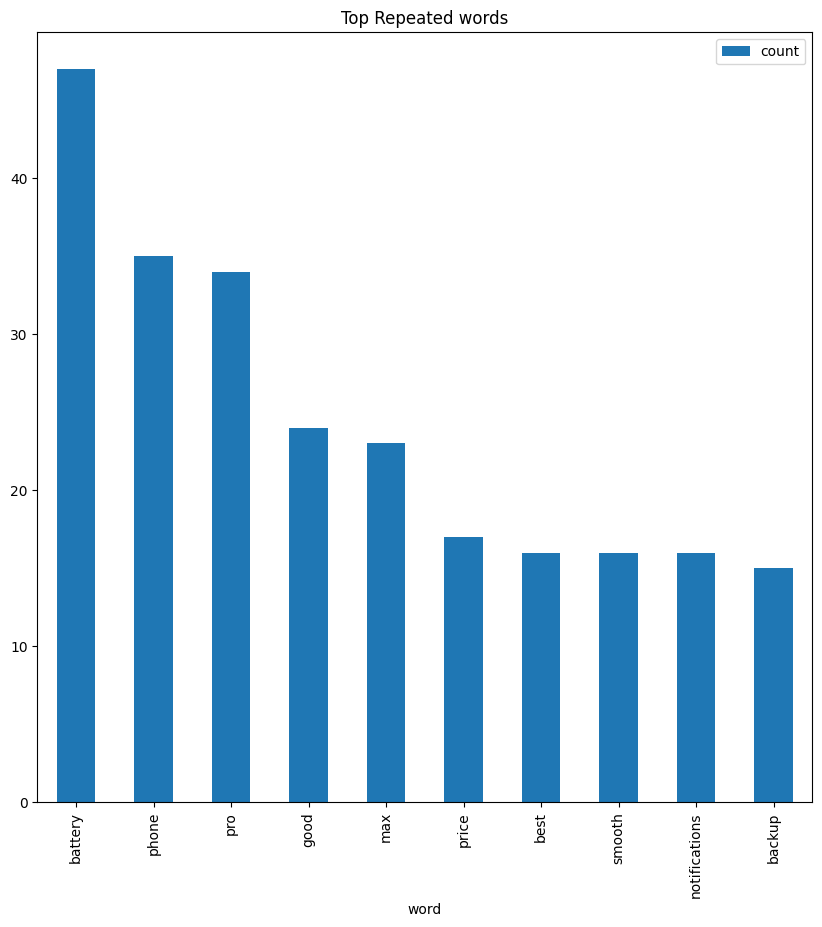

In [52]:
word_df[0:10].plot(kind='bar',x='word',title= 'Top Repeated words',figsize=(10,10))

In [53]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [54]:
sentence=sent_tokenize(text)
sentence

['\ni was completely satisfied with amazons delivery, it was safe.',
 'the phone is amazing\n \ni was completely satisfied with amazons delivery, it was safe.',
 'the phone is amazing\n \nBattery backup good but not good for gaming as iPhone 12 Pro Max , it’s comparatively slow if compared to iPhone 12 Pro max , heat’s up if videos are watched for long period thus battery health drops\n \ni was completely satisfied with amazons delivery, it was safe.',
 'the phone is amazing\n \nBattery backup good but not good for gaming as iPhone 12 Pro Max , it’s comparatively slow if compared to iPhone 12 Pro max , heat’s up if videos are watched for long period thus battery health drops\n \nSwitched from Android to iPhone.',
 'Here are my pros and cons.Pros:1) The battery life on the Pro Max is just excellent.',
 'No android with even a 6000 Mah can beat it, it is that well optimised.2) The camera as you can guess is one of the best if not the best.3) The screen with 120hz feels so smooth.',
 'It’

In [55]:
sent_df= pd.DataFrame(sentence,columns=['sentence'])
sent_df

,sentence
0,\ni was completely satisfied with amazons deli...
1,the phone is amazing\n \ni was completely sati...
2,the phone is amazing\n \nBattery backup good b...
3,the phone is amazing\n \nBattery backup good b...
4,Here are my pros and cons.Pros:1) The battery ...
...,...
191,Need to charge once in two days only even with...
192,Charging is fast with 30 watt apple charger.
193,Best camera quality.
194,Speakers are excellent.


In [56]:
from google.colab import files
uploaded= files.upload()

Saving Afinn.csv to Afinn.csv


In [57]:
aff= pd.read_csv('Afinn.csv',encoding='latin-1')
aff

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [58]:
aff_dict= aff.set_index('word')['value'].to_dict()

In [59]:
aff_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [60]:
def sentiment_count(text:str):
  sent_value=0
  if text:
    sentence= nlp(text)
    for token in sentence:
      sent_value+= aff_dict.get(token.lemma_,0)
    return sent_value

In [61]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(sentiment_count)

In [62]:
sent_df

,sentence,sentiment_value
0,\ni was completely satisfied with amazons deli...,3
1,the phone is amazing\n \ni was completely sati...,7
2,the phone is amazing\n \nBattery backup good b...,12
3,the phone is amazing\n \nBattery backup good b...,9
4,Here are my pros and cons.Pros:1) The battery ...,3
...,...,...
191,Need to charge once in two days only even with...,0
192,Charging is fast with 30 watt apple charger.,0
193,Best camera quality.,3
194,Speakers are excellent.,3


In [63]:
sent_df['word_count']= sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,sentiment_value,word_count
0,\ni was completely satisfied with amazons deli...,3,10
1,the phone is amazing\n \ni was completely sati...,7,14
2,the phone is amazing\n \nBattery backup good b...,12,52
3,the phone is amazing\n \nBattery backup good b...,9,47
4,Here are my pros and cons.Pros:1) The battery ...,3,16
...,...,...,...
191,Need to charge once in two days only even with...,0,12
192,Charging is fast with 30 watt apple charger.,0,8
193,Best camera quality.,3,3
194,Speakers are excellent.,3,3


In [64]:
sent_df['index']= range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,\ni was completely satisfied with amazons deli...,3,10,0
1,the phone is amazing\n \ni was completely sati...,7,14,1
2,the phone is amazing\n \nBattery backup good b...,12,52,2
3,the phone is amazing\n \nBattery backup good b...,9,47,3
4,Here are my pros and cons.Pros:1) The battery ...,3,16,4
...,...,...,...,...
191,Need to charge once in two days only even with...,0,12,191
192,Charging is fast with 30 watt apple charger.,0,8,192
193,Best camera quality.,3,3,193
194,Speakers are excellent.,3,3,194


<Axes: title={'center': 'Sentiments'}, xlabel='index', ylabel='sentiment_value'>

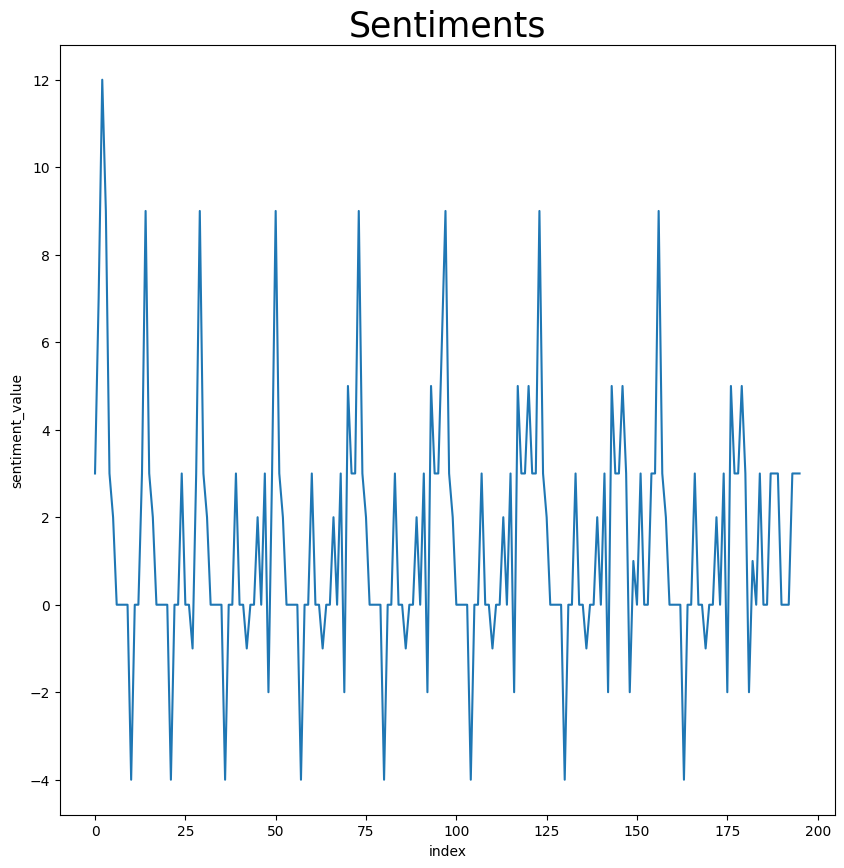

In [65]:
plt.figure(figsize=(10,10))
plt.title('Sentiments',size=25)
sns.lineplot(data=sent_df,x='index',y='sentiment_value')

<ipython-input-66-7fb7d4378b5e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

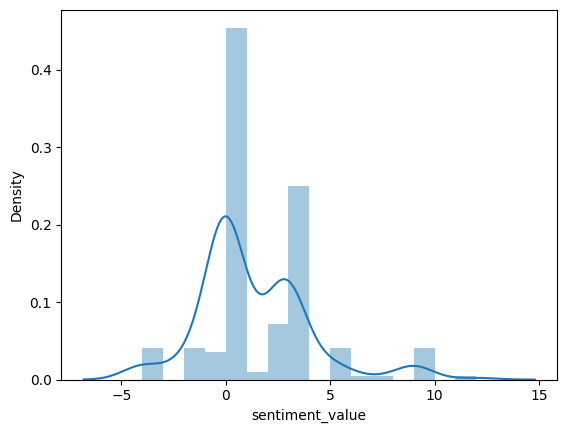

In [66]:
sns.distplot(sent_df['sentiment_value'])

In [67]:
a=sent_df[sent_df['sentiment_value']==0]
a

,sentence,sentiment_value,word_count,index
6,It’s just a different experience.,0,5,6
7,Androids with similar refresh don’t feel so sm...,0,15,7
8,Got the 512GB pro max for 1.55 lac.,0,8,8
9,and that is not at all value for the amount of...,0,14,9
11,Android compiles notifications much better.,0,5,11
...,...,...,...,...
185,I checked for its authenticity by verifying it...,0,12,185
186,"Now, most importantly a genuine Apple iPhone 1...",0,15,186
190,12 hours of screen on time.,0,6,190
191,Need to charge once in two days only even with...,0,12,191


In [68]:
sent_df.sort_values(by='sentiment_value',ascending=False)

,sentence,sentiment_value,word_count,index
2,the phone is amazing\n \nBattery backup good b...,12,52,2
123,the phone is amazing\n \nBattery backup good b...,9,47,123
14,the phone is amazing\n \nBattery backup good b...,9,47,14
3,the phone is amazing\n \nBattery backup good b...,9,47,3
97,the phone is amazing\n \nBattery backup good b...,9,47,97
...,...,...,...,...
10,"With no charger!2) Software wise, the notifica...",-4,10,10
21,"With no charger!2) Software wise, the notifica...",-4,10,21
163,"With no charger!2) Software wise, the notifica...",-4,10,163
104,"With no charger!2) Software wise, the notifica...",-4,10,104


In [69]:
import wordcloud

In [70]:
from wordcloud import wordcloud

In [71]:
def visualization(wordcloud):
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud)
  plt.axis('off')

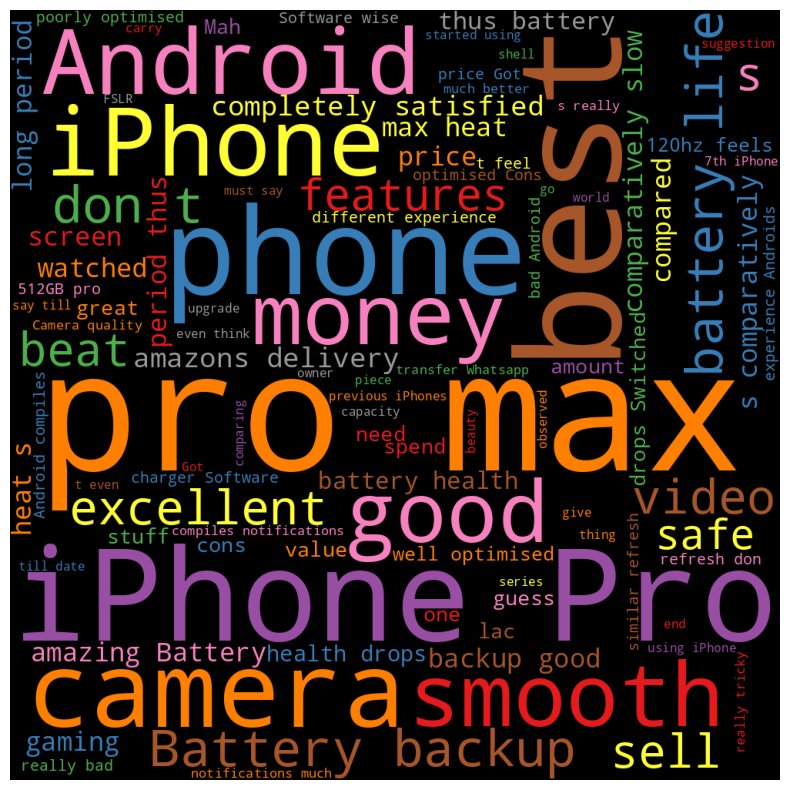

In [73]:
wordcloud= WordCloud(width=1000,height=1000,background_color='black',max_words=100, colormap='Set1').generate(text)
visualization(wordcloud)